In [36]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [37]:
#Loading the DataSet
car=pd.read_csv('preprocessed_car_data.csv')

#Checking the Results
car.head()

,LogPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [38]:
#Declaring Feature variable & Target variable
x=car.drop('LogPrice',axis=1)#Feature Var
y=car['LogPrice'].values#Target Var

x.shape,y.shape

((3850, 17), (3850,))

In [39]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler

#Creating an instance of StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled

array([[ 1.21610555, -0.47286288,  2.27373521, ..., -0.16161498,
         1.34012432,  0.32215587],
       [ 2.78549315,  0.50699531, -0.43980495, ..., -0.16161498,
        -0.74619943,  0.32215587],
       [ 2.06357486,  2.79333108, -0.43980495, ..., -0.16161498,
        -0.74619943,  0.32215587],
       ...,
       [-1.58786698,  0.61586844, -0.43980495, ..., -0.16161498,
        -0.74619943,  0.32215587],
       [-1.67156765,  1.1602341 ,  2.27373521, ..., -0.16161498,
         1.34012432,  0.32215587],
       [-0.38466981, -0.47286288, -0.43980495, ..., -0.16161498,
        -0.74619943,  0.32215587]])

In [40]:
#Checking the First Row of Scaled Data
x_scaled[0]

array([ 1.21610555, -0.47286288,  2.27373521, -0.48820109, -0.29175054,
       -0.35551329, -0.38544522, -0.53148692, -0.26521009, -0.32411675,
        1.28156776, -0.32704437, -0.43390276, -0.41601106, -0.16161498,
        1.34012432,  0.32215587])

In [41]:
#Splitting the DataSet into Training & Testing Sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3080, 17), (770, 17), (3080,), (770,))

In [42]:
#Creating a Regression Model
from sklearn.linear_model import LinearRegression

#Creating an instace of Regression Model
regressor=LinearRegression()

#Fit the Data
regressor.fit(xtrain,ytrain)

LinearRegression()

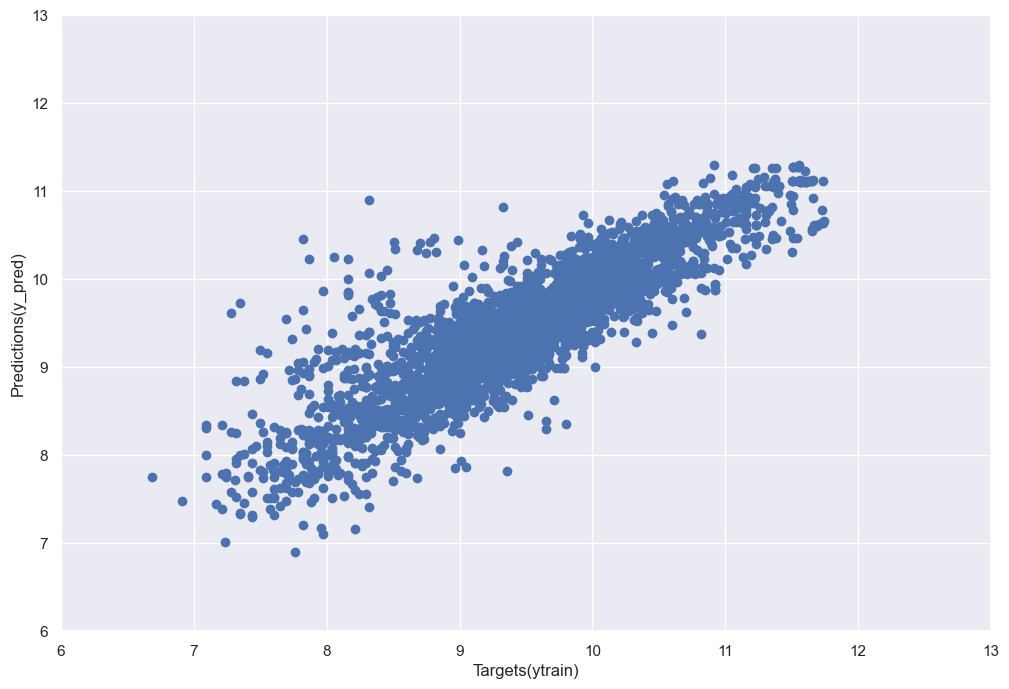

In [50]:
#Predicting on Training Data
y_pred=regressor.predict(xtrain)

#plotting 
plt.figure(figsize=(12,8))
plt.scatter(ytrain,y_pred)
plt.xlabel('Targets(ytrain)')
plt.ylabel('Predictions(y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Training Residuals PDF')

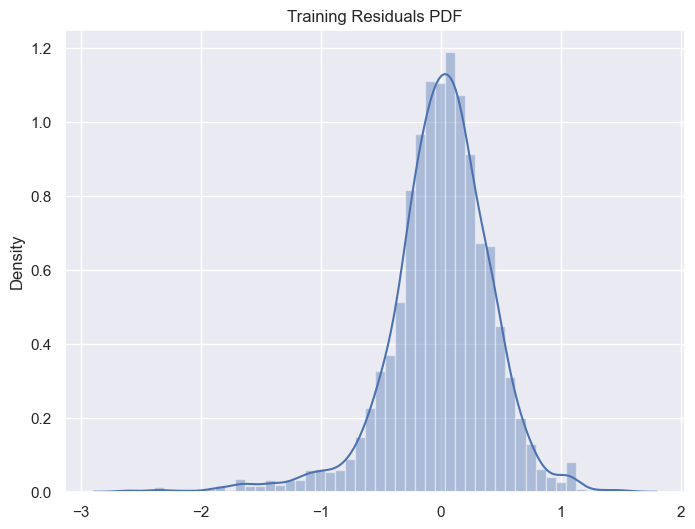

In [51]:
#Plotting the Distribution of Residuals
residuals=ytrain-y_pred

plt.figure(figsize=(8,6))
sns.distplot(residuals)
plt.title('Training Residuals PDF')

In [55]:
#Checking the r2_score
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.7595371571286604

In [71]:
#Checking the mean_squared_error
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(np.exp(ytrain),np.exp(y_pred)))

10174.60839071923

In [76]:
lr_summ=pd.DataFrame(x.columns.values,columns=['Features'])
lr_summ['Weights']=regressor.coef_
lr_summ

,Features,Weights
0,Mileage,-0.455699
1,EngineV,0.217281
2,Brand_BMW,0.028230
3,Brand_Mercedes-Benz,0.019509
4,Brand_Mitsubishi,-0.128867
5,Brand_Renault,-0.169628
6,Brand_Toyota,-0.048839
7,Brand_Volkswagen,-0.079995
8,Body_hatch,-0.139841
9,Body_other,-0.100247


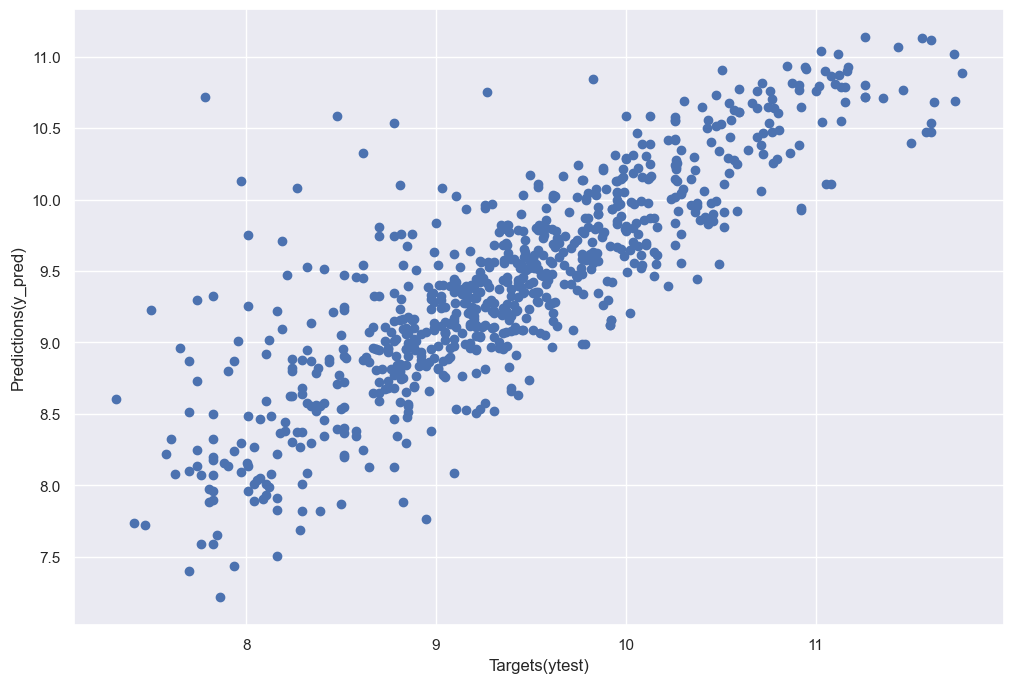

In [78]:
#Predicting on Testing Data
y_pred=regressor.predict(xtest)

#plotting 
plt.figure(figsize=(12,8))
plt.scatter(ytest,y_pred)
plt.xlabel('Targets(ytest)')
plt.ylabel('Predictions(y_pred)')
plt.show()

In [80]:
#Checking the r2_score on Test Data
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.7057768937345055

In [81]:
#Checking the mean_squared_error on Test Data
from sklearn.metrics import mean_squared_error as mse
np.sqrt(mse(np.exp(ytest),np.exp(y_pred)))

11023.34875719878

In [83]:
#Creating a DataFrame to compare Original and Predicted values
df=pd.DataFrame(np.exp(y_pred),columns=['Predicted'])
df['Target']=np.exp(ytest)
df

,Predicted,Target
0,21545.159097,24750.000050
1,13743.760336,10699.999995
2,4737.120129,3200.000001
3,9255.169414,9899.999999
4,5379.433953,5999.999999
...,...,...
765,39576.487479,4800.000000
766,14114.180409,14900.000001
767,10306.702019,8300.000002
768,14492.714895,17799.999995


In [86]:
df['Residual']=df['Target']-df['Predicted']
df['Difference%']=np.absolute(df['Residual']/df['Target']*100)
df

,Predicted,Target,Residual,Difference%
0,21545.159097,24750.000050,3204.840952,12.948852
1,13743.760336,10699.999995,-3043.760341,28.446358
2,4737.120129,3200.000001,-1537.120128,48.035004
3,9255.169414,9899.999999,644.830585,6.513440
4,5379.433953,5999.999999,620.566046,10.342767
...,...,...,...,...
765,39576.487479,4800.000000,-34776.487478,724.510156
766,14114.180409,14900.000001,785.819592,5.273957
767,10306.702019,8300.000002,-2006.702018,24.177133
768,14492.714895,17799.999995,3307.285100,18.580253


In [87]:
df.describe()

,Predicted,Target,Residual,Difference%
count,770.000000,770.000000,770.000000,770.000000
mean,15964.530193,17498.166294,1533.636101,42.016956
std,12384.706802,18527.251642,10923.238323,91.778434
min,1363.148808,1500.000000,-42639.494889,0.000234
25%,7756.478018,6799.250002,-2429.585552,11.015439
50%,12066.831930,11549.999997,-70.036554,24.239413
75%,19879.071869,20974.250008,3112.675915,42.526915
max,68598.060439,129221.999422,81230.684143,1776.645621


In [92]:
pd.options.display.max_rows=1000
pd.set_option('display.float_format', lambda x:'%.2f'%x)
df.sort_values(by=['Difference%'])

,Predicted,Target,Residual,Difference%
450,21000.05,21000.00,-0.05,0.00
714,6698.08,6699.00,0.92,0.01
517,47053.68,47000.00,-53.68,0.11
176,9817.61,9800.00,-17.61,0.18
322,21291.46,21335.00,43.54,0.20
733,20542.03,20500.00,-42.03,0.21
485,20542.03,20500.00,-42.03,0.21
655,38381.34,38300.00,-81.34,0.21
20,9022.48,9000.00,-22.48,0.25
142,12852.45,12800.00,-52.45,0.41
